In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame({'gender':['M','F',None, 'M','F'],
                   'score' :[5,4,3,4,None]})

In [7]:
#df.to_csv('score.csv', index=False)

In [8]:
df

,gender,score
0,M,5.0
1,F,4.0
2,None,3.0
3,M,4.0
4,F,NaN


In [9]:
data = pd.read_csv('score.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  4 non-null      object 
 1   score   4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [11]:
data.isnull().sum()

gender    1
score     1
dtype: int64

In [12]:
data[data.isnull()]

,gender,score
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [13]:
data[data.notnull()]

,gender,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [14]:
data

,gender,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [15]:
data.dropna() #dropna를 쓰면 null값 항목이 다 빠져버림.

,gender,score
0,M,5.0
1,F,4.0
3,M,4.0


In [16]:
data.dropna(subset = ['gender']) # gender 항목의 null값 삭제.

,gender,score
0,M,5.0
1,F,4.0
3,M,4.0
4,F,NaN


In [17]:
#Null, None, NA, NaN

In [18]:
data['score'].fillna(0, inplace=True) #null값 채워넣기

In [19]:
data

,gender,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,0.0


In [20]:
data['score'].fillna(data['score'].mean())

0    5.0
1    4.0
2    3.0
3    4.0
4    0.0
Name: score, dtype: float64

In [21]:
data['score'].mean()

3.2

In [22]:
data['score'].median() #데이터의 평균보다 중앙값을 더 쓰게 됨 (이상치 때문)

4.0

In [23]:
df = pd.DataFrame({'gender':['M','F','None', 'M','F'],
                   'score' :[5,4,3,4,None]})

In [24]:
gender_map = {'M':1, 'F':2}

In [25]:
df['gender'] = df['gender'].map(gender_map)

In [26]:
df['gender'].fillna(3, inplace=True)

In [27]:
df

,gender,score
0,1.0,5.0
1,2.0,4.0
2,3.0,3.0
3,1.0,4.0
4,2.0,NaN


In [28]:
df['score'].fillna(50, inplace=True)

In [29]:
df

,gender,score
0,1.0,5.0
1,2.0,4.0
2,3.0,3.0
3,1.0,4.0
4,2.0,50.0


In [32]:
df['gender'].unique()

array([1., 2., 3.])

In [30]:
df['score'].mean() #평균은 이상치의 영향을 많이 받음.

13.2

In [31]:
df['score'].median() #중앙값을 많이 선호.

4.0

In [33]:
df #score 전체 평균보다 높은 애들은 중앙값을 넣겠다!!

,gender,score
0,1.0,5.0
1,2.0,4.0
2,3.0,3.0
3,1.0,4.0
4,2.0,50.0


In [34]:
import numpy as np

In [38]:
mean = df['score'].mean()
med = df['score'].median()

In [40]:
df['score'] = np.where(df['score'] > mean, med, df['score'])

In [41]:
df['score']

0    5.0
1    4.0
2    3.0
3    4.0
4    4.0
Name: score, dtype: float64

## 데이터 시각화

In [42]:
import pydataset as pds

In [43]:
mpg =pds.data('mpg')

In [44]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [45]:
mpg['drv']

1      f
2      f
3      f
4      f
5      f
      ..
230    f
231    f
232    f
233    f
234    f
Name: drv, Length: 234, dtype: object

In [46]:
mpg['drv'].value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [51]:
mpg_df =mpg.groupby('drv', as_index = False)['hwy'].mean()

In [52]:
mpg_df

,drv,hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


In [55]:
import seaborn as sns #seaborn 데이터 시각화 

<AxesSubplot:xlabel='drv', ylabel='hwy'>

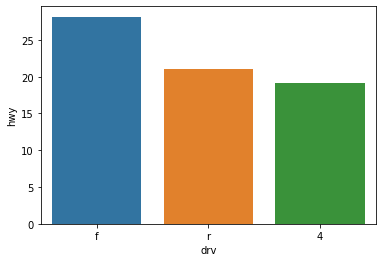

In [58]:
sns.barplot(data=mpg_df, x = 'drv', y='hwy')

In [57]:
mpg_df.sort_values('hwy', ascending= False, inplace=True)

In [60]:
eco =pds.data('economics')

In [61]:
eco

,date,pce,pop,psavert,uempmed,unemploy
1,1967-06-30,507.8,198712,9.8,4.5,2944
2,1967-07-31,510.9,198911,9.8,4.7,2945
3,1967-08-31,516.7,199113,9.0,4.6,2958
4,1967-09-30,513.3,199311,9.8,4.9,3143
5,1967-10-31,518.5,199498,9.7,4.7,3066
...,...,...,...,...,...,...
474,2006-11-30,9478.5,301070,-1.1,7.3,6849
475,2006-12-31,9540.3,301296,-0.9,8.1,7017
476,2007-01-31,9610.6,301481,-1.0,8.1,6865
477,2007-02-28,9653.0,301684,-0.7,8.5,6724


In [63]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 1 to 478
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      478 non-null    object 
 1   pce       478 non-null    float64
 2   pop       478 non-null    int64  
 3   psavert   478 non-null    float64
 4   uempmed   478 non-null    float64
 5   unemploy  478 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 26.1+ KB


In [66]:
eco['date2'] = pd.to_datetime(eco['date'])

In [71]:
eco['date2'].dt.year

1      1967
2      1967
3      1967
4      1967
5      1967
       ... 
474    2006
475    2006
476    2007
477    2007
478    2007
Name: date2, Length: 478, dtype: int64

In [72]:
eco['date2'].dt.month

1       6
2       7
3       8
4       9
5      10
       ..
474    11
475    12
476     1
477     2
478     3
Name: date2, Length: 478, dtype: int64

In [73]:
eco['date2'].dt.day

1      30
2      31
3      31
4      30
5      31
       ..
474    30
475    31
476    31
477    28
478    31
Name: date2, Length: 478, dtype: int64

In [74]:
eco.sort_values(['date2'])

,date,pce,pop,psavert,uempmed,unemploy,date2
1,1967-06-30,507.8,198712,9.8,4.5,2944,1967-06-30
2,1967-07-31,510.9,198911,9.8,4.7,2945,1967-07-31
3,1967-08-31,516.7,199113,9.0,4.6,2958,1967-08-31
4,1967-09-30,513.3,199311,9.8,4.9,3143,1967-09-30
5,1967-10-31,518.5,199498,9.7,4.7,3066,1967-10-31
...,...,...,...,...,...,...,...
474,2006-11-30,9478.5,301070,-1.1,7.3,6849,2006-11-30
475,2006-12-31,9540.3,301296,-0.9,8.1,7017,2006-12-31
476,2007-01-31,9610.6,301481,-1.0,8.1,6865,2007-01-31
477,2007-02-28,9653.0,301684,-0.7,8.5,6724,2007-02-28


<AxesSubplot:xlabel='date2', ylabel='unemploy'>

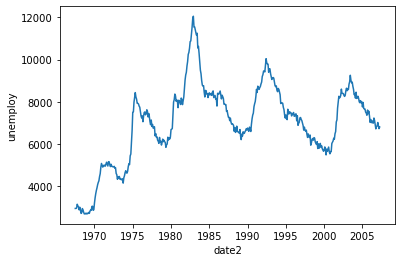

In [77]:
sns.lineplot(data= eco, x= 'date2', y= 'unemploy')

<AxesSubplot:xlabel='date', ylabel='unemploy'>

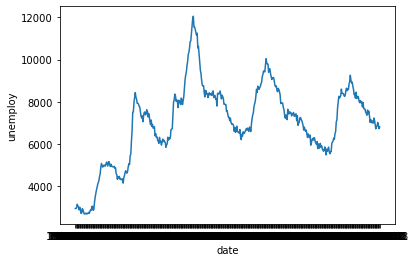

In [78]:
sns.lineplot(data= eco, x= 'date', y= 'unemploy')

In [79]:
eco

,date,pce,pop,psavert,uempmed,unemploy,date2
1,1967-06-30,507.8,198712,9.8,4.5,2944,1967-06-30
2,1967-07-31,510.9,198911,9.8,4.7,2945,1967-07-31
3,1967-08-31,516.7,199113,9.0,4.6,2958,1967-08-31
4,1967-09-30,513.3,199311,9.8,4.9,3143,1967-09-30
5,1967-10-31,518.5,199498,9.7,4.7,3066,1967-10-31
...,...,...,...,...,...,...,...
474,2006-11-30,9478.5,301070,-1.1,7.3,6849,2006-11-30
475,2006-12-31,9540.3,301296,-0.9,8.1,7017,2006-12-31
476,2007-01-31,9610.6,301481,-1.0,8.1,6865,2007-01-31
477,2007-02-28,9653.0,301684,-0.7,8.5,6724,2007-02-28


In [80]:
#월별 데이터 살펴보기 ( 변수 하나가 더 필요 month)

In [81]:
eco['month'] = eco['date2'].dt.month

In [85]:
eco_df = eco.groupby('month', as_index =False)['unemploy'].mean()

<AxesSubplot:xlabel='month', ylabel='unemploy'>

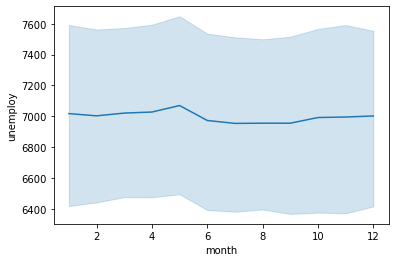

In [83]:
sns.lineplot(data=eco, x='month', y= 'unemploy') #모든 년도의 월별 데이터를 합친거라 의미가없음.

<AxesSubplot:xlabel='month', ylabel='unemploy'>

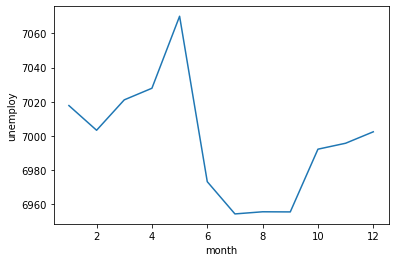

In [87]:
sns.lineplot(data=eco_df, x='month' , y= 'unemploy') #groupby로 뽑은 데이터로 다시 도출

In [88]:
eco

,date,pce,pop,psavert,uempmed,unemploy,date2,month
1,1967-06-30,507.8,198712,9.8,4.5,2944,1967-06-30,6
2,1967-07-31,510.9,198911,9.8,4.7,2945,1967-07-31,7
3,1967-08-31,516.7,199113,9.0,4.6,2958,1967-08-31,8
4,1967-09-30,513.3,199311,9.8,4.9,3143,1967-09-30,9
5,1967-10-31,518.5,199498,9.7,4.7,3066,1967-10-31,10
...,...,...,...,...,...,...,...,...
474,2006-11-30,9478.5,301070,-1.1,7.3,6849,2006-11-30,11
475,2006-12-31,9540.3,301296,-0.9,8.1,7017,2006-12-31,12
476,2007-01-31,9610.6,301481,-1.0,8.1,6865,2007-01-31,1
477,2007-02-28,9653.0,301684,-0.7,8.5,6724,2007-02-28,2


In [90]:
eco['date2'].dt.year

1      1967
2      1967
3      1967
4      1967
5      1967
       ... 
474    2006
475    2006
476    2007
477    2007
478    2007
Name: date2, Length: 478, dtype: int64

In [91]:
eco['year'] = eco['date2'].dt.year

In [92]:
eco['year']

1      1967
2      1967
3      1967
4      1967
5      1967
       ... 
474    2006
475    2006
476    2007
477    2007
478    2007
Name: year, Length: 478, dtype: int64

In [93]:
eco_df = eco.groupby('year', as_index =False)['unemploy'].mean()

<AxesSubplot:xlabel='year', ylabel='unemploy'>

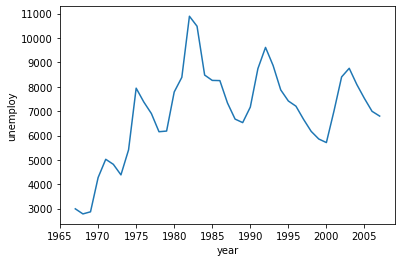

In [94]:
sns.lineplot(data=eco_df, x='year' , y= 'unemploy')

In [95]:
eco['date2'].dt.day

1      30
2      31
3      31
4      30
5      31
       ..
474    30
475    31
476    31
477    28
478    31
Name: date2, Length: 478, dtype: int64

In [96]:
eco['day'] = eco['date2'].dt.day

In [97]:
eco['day']

1      30
2      31
3      31
4      30
5      31
       ..
474    30
475    31
476    31
477    28
478    31
Name: day, Length: 478, dtype: int64

In [98]:
eco_df = eco.groupby('day', as_index =False)['unemploy'].mean()

In [99]:
eco_df

,day,unemploy
0,28,7055.733333
1,29,6845.900000
2,30,6987.798742
3,31,7001.648746


<AxesSubplot:xlabel='day', ylabel='unemploy'>

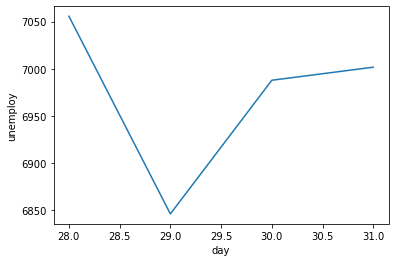

In [100]:
sns.lineplot(data=eco_df, x='day' , y= 'unemploy')

In [101]:
eco


,date,pce,pop,psavert,uempmed,unemploy,date2,month,year,day
1,1967-06-30,507.8,198712,9.8,4.5,2944,1967-06-30,6,1967,30
2,1967-07-31,510.9,198911,9.8,4.7,2945,1967-07-31,7,1967,31
3,1967-08-31,516.7,199113,9.0,4.6,2958,1967-08-31,8,1967,31
4,1967-09-30,513.3,199311,9.8,4.9,3143,1967-09-30,9,1967,30
5,1967-10-31,518.5,199498,9.7,4.7,3066,1967-10-31,10,1967,31
...,...,...,...,...,...,...,...,...,...,...
474,2006-11-30,9478.5,301070,-1.1,7.3,6849,2006-11-30,11,2006,30
475,2006-12-31,9540.3,301296,-0.9,8.1,7017,2006-12-31,12,2006,31
476,2007-01-31,9610.6,301481,-1.0,8.1,6865,2007-01-31,1,2007,31
477,2007-02-28,9653.0,301684,-0.7,8.5,6724,2007-02-28,2,2007,28


In [102]:
eco_df

,day,unemploy
0,28,7055.733333
1,29,6845.900000
2,30,6987.798742
3,31,7001.648746
